# Analisi tamponi

In [17]:
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1
import pickle as pkl
import numpy as np

from aidam.aicharts import aidam_distribution_map

## Lettura dati

In [18]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 236
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-10-16T17:00:00


Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [19]:
grid_shape=(7,3)

posizioni=np.array(range(grid_shape[0]*grid_shape[1]))

posizioni=np.reshape(posizioni,grid_shape)

grid_cell={}
for r in range(grid_shape[0]):
    for c in range(grid_shape[1]):
        grid_cell[posizioni[r,c]]=(r,c)

## Tamponi effettuati

### Nazionale

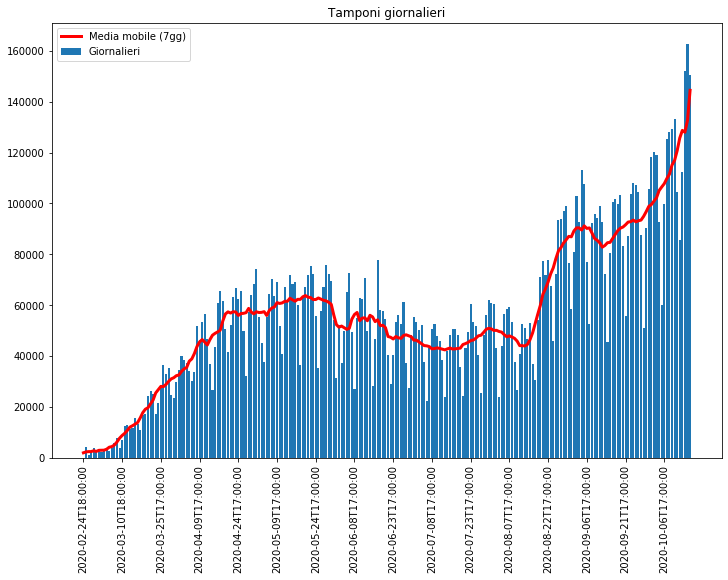

In [20]:
xtick_pos=list(range(0,len(giorni),15))


plt.figure(figsize=(12,8))
plt.title('Tamponi giornalieri')
plt.bar(day_counter,trend['tamponi_giornalieri']['Italia'],label='Giornalieri')
plt.plot(day_counter,
        moving_function_rev1(trend['tamponi_giornalieri']['Italia'],np.nanmean,3,3),
        label='Media mobile (7gg)',color='r',linewidth=3),
plt.xticks(xtick_pos,giorni[xtick_pos],rotation=90)
#plt.grid()
plt.legend()
plt.show()

#### Ultimi 7 giorni

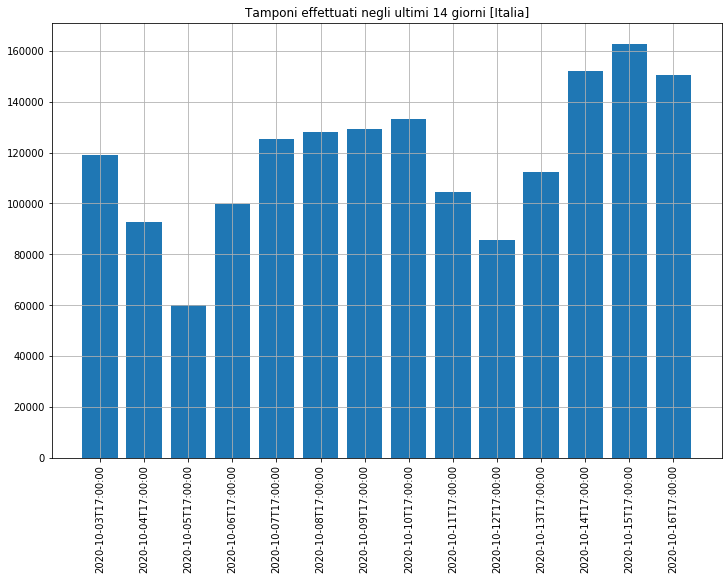

In [21]:
ultimi_giorni=14
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Tamponi effettuati negli ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['tamponi_giornalieri'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.show()

### Regionale

### Tamponi effettuati nell'ultima settimana nelle varie regioni

In [22]:
tamponi_ultima_sett=[np.sum(trend['tamponi_giornalieri'][r][-7:]) for r in regioni]

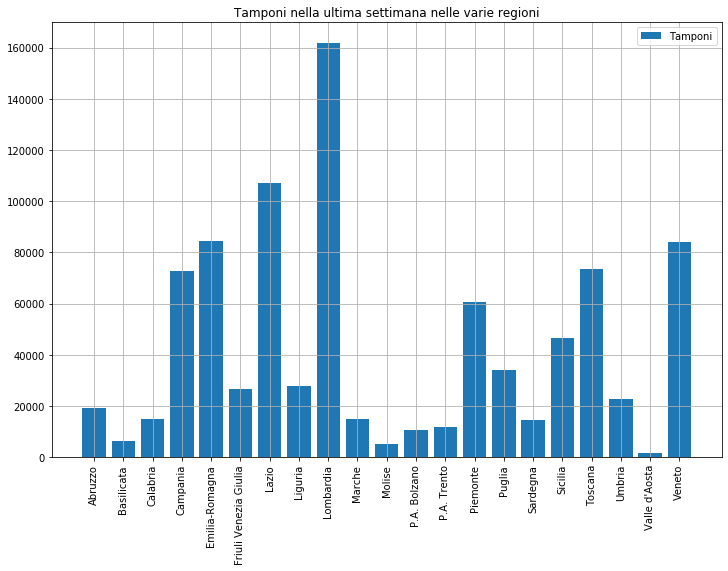

In [23]:
plt.figure(figsize=(12,8))
plt.title('Tamponi nella ultima settimana nelle varie regioni')
plt.bar(range(len(regioni)),tamponi_ultima_sett,label='Tamponi')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()

## Percentuale tamponi positivi

### Nazionale nel tempo

Percentuale attuale tamponi positivi:  6.66%


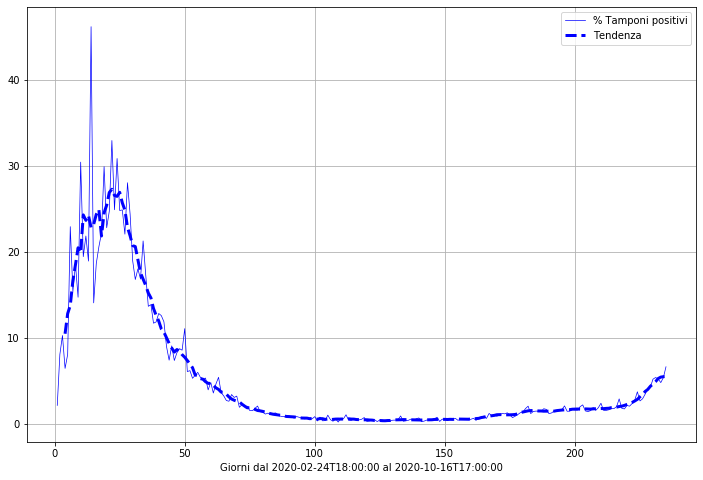

In [24]:
print('Percentuale attuale tamponi positivi: %5.2f%%'%trend['perc_tamponi_positivi']['Italia'][-1])

plt.figure(figsize=(12,8))
plt.plot(day_counter,trend['perc_tamponi_positivi']['Italia'],
         'b-',
         label='% Tamponi positivi',linewidth=0.7)
# metto anche la versione lisciata
plt.plot(day_counter,moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.mean,3,3),
         'b--',
         label='Tendenza',linewidth=3)
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.grid()
plt.legend()
plt.show()

### Adamento della percentuale dei tamponi positivi rispetto ai tamponi effettuati

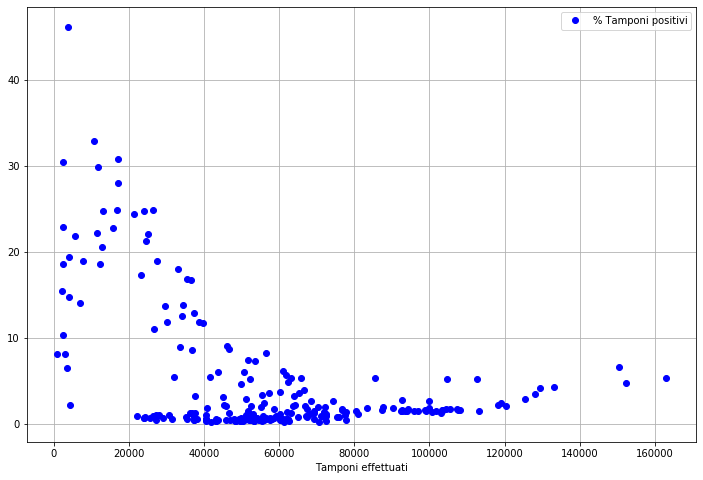

In [25]:
plt.figure(figsize=(12,8))
plt.plot(trend['tamponi_giornalieri']['Italia'],trend['perc_tamponi_positivi']['Italia'],
         'bo',
         label='% Tamponi positivi')

plt.xlabel('Tamponi effettuati')
plt.grid()
plt.legend()
plt.show()

### Nazionale ultimi giorni

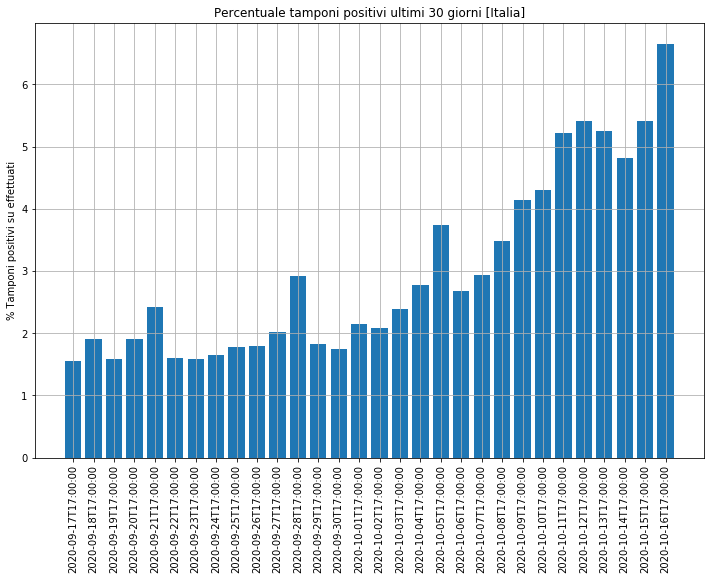

In [26]:
ultimi_giorni=30
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Percentuale tamponi positivi ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['perc_tamponi_positivi'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('% Tamponi positivi su effettuati')
plt.show()

In [27]:
trend['perc_tamponi_positivi']['Italia'][-14:]

array([2.39128241, 2.78059409, 3.74661775, 2.68392453, 2.93502721,
       3.48014801, 4.14919171, 4.30104295, 5.21317052, 5.40600641,
       5.24328263, 4.81747221, 5.40348121, 6.65660307])

### Regionale nel tempo

Percentuale tamponi positivi nel tempo nelle varie regioni

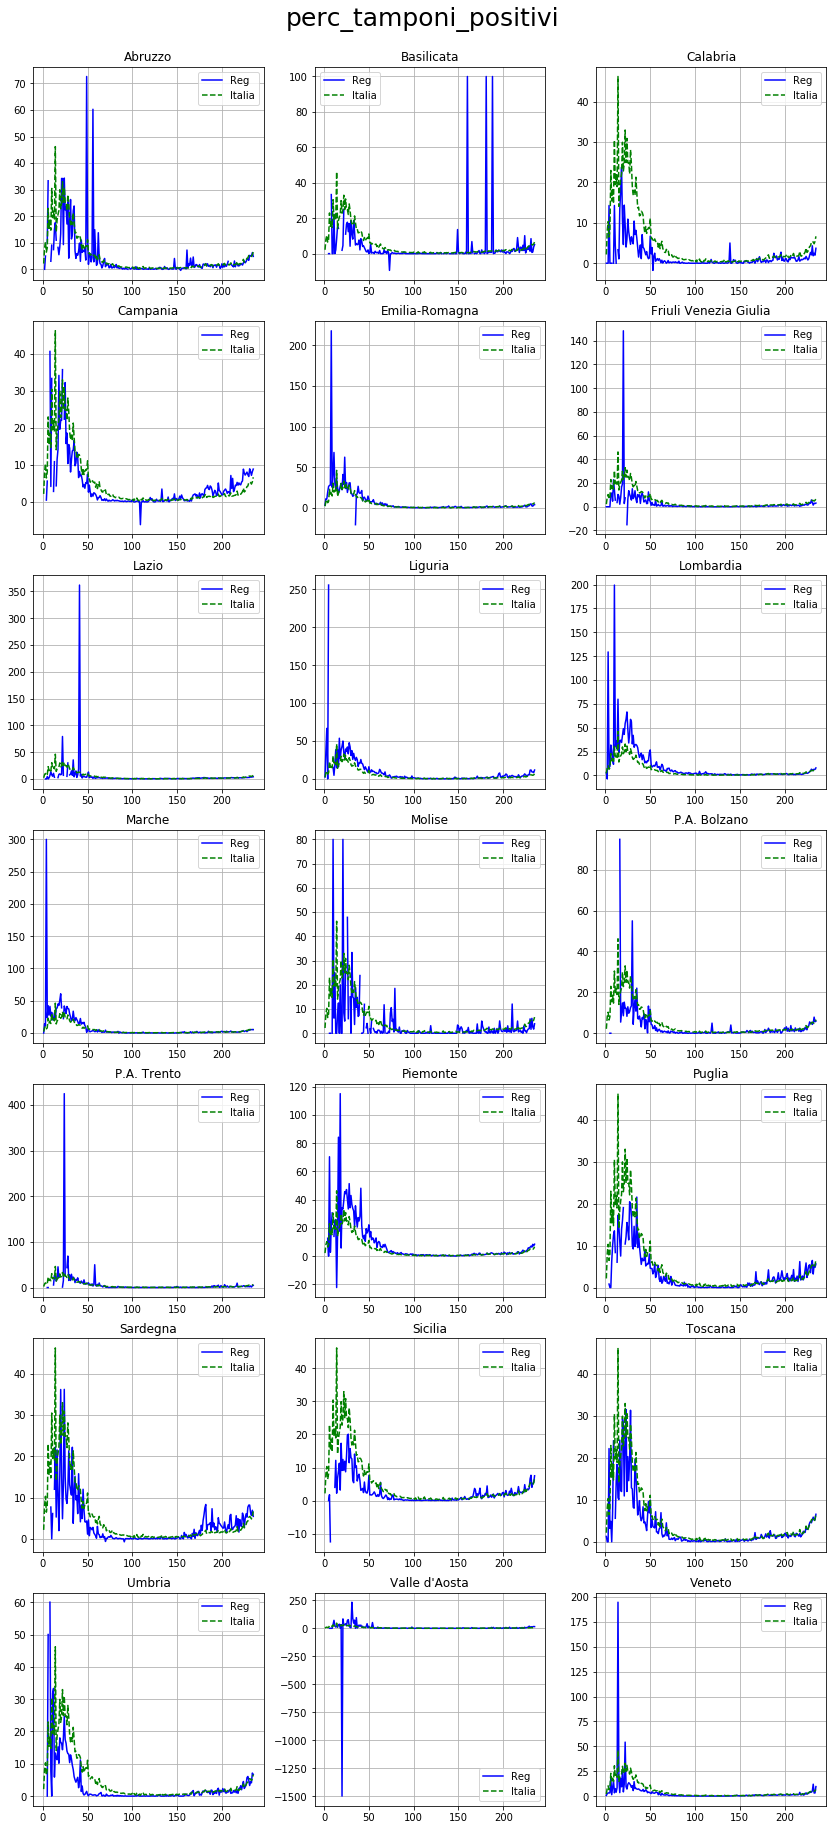

In [28]:
indicatori_selected=['perc_tamponi_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(12,25))
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore][regione],'b-',label='Reg')
        ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
        # plotto anche media italiana
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore]['Italia'],'g--',label='Italia')
        ax[grid_cell[i][0],grid_cell[i][1]].legend()
        ax[grid_cell[i][0],grid_cell[i][1]].grid()

### Percentuale tamponi positivi nelle varie regioni

#### Odierna (media ultimi giorni)

**Media** dei tamponi positivi in percentuale su quelli effettuati negli ultimi giorni nelle varie regioni.

In [29]:
actual_perc_pos=[np.nanmean(trend['perc_tamponi_positivi'][r][-7:]) for r in regioni]
actual_perc_pos=np.array(actual_perc_pos)
ordine=np.argsort(actual_perc_pos)

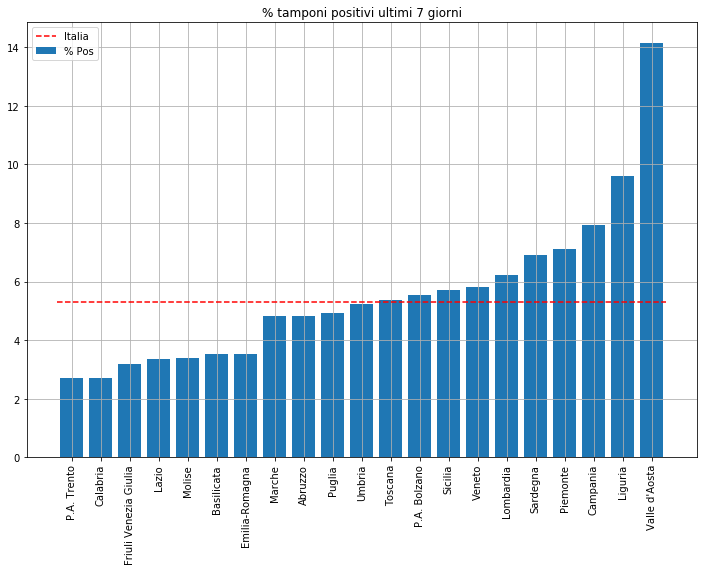

In [30]:
plt.figure(figsize=(12,8))
plt.title('% tamponi positivi ultimi 7 giorni')
plt.bar(range(len(regioni)),actual_perc_pos[ordine],label='% Pos')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.hlines(np.nanmean(trend['perc_tamponi_positivi']['Italia'][-7:]),
           xmin=-0.5,xmax=20.5,
           label='Italia',color='r',ls='--')
plt.grid()
plt.legend()
plt.show()

## Mappa tamponi

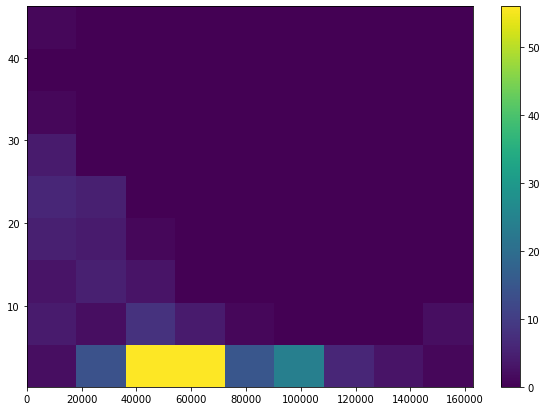

In [31]:
trend['perc_tamponi_positivi']['Italia'][0]=trend['perc_tamponi_positivi']['Italia'][1]

fig,ax=plt.subplots(figsize=(10,7))

temp=aidam_distribution_map(trend['tamponi_giornalieri']['Italia'],
                       trend['perc_tamponi_positivi']['Italia'],
                            plotax=ax,
                            nxbins=10,nybins=10)

fig.colorbar(temp[1][3])

In [32]:
temp


(<matplotlib.axes._subplots.AxesSubplot at 0x1bed5d56978>,
 (array([[ 2.,  4.,  3.,  5.,  6.,  4.,  1.,  0.,  1.],
         [14.,  2.,  5.,  4.,  5.,  0.,  0.,  0.,  0.],
         [56.,  8.,  3.,  1.,  0.,  0.,  0.,  0.,  0.],
         [56.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [15.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
  array([     0.        ,  18103.55555556,  36207.11111111,  54310.66666667,
          72414.22222222,  90517.77777778, 108621.33333333, 126724.88888889,
         144828.44444444, 162932.        ]),
  array([ 0.2308128 ,  5.33930596, 10.44779912, 15.55629227, 20.66478543,
         25.77327859, 30.88177175, 35.99026491, 41.09875806, 46.20725122]),
  <matplotlib.collections.QuadMesh at 0x1bed5d2d7f0>))